In [1]:
#Proyecto M3, Par II, E3. Intervalos de confianza

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Leyendo los archivos

flights = pd.read_csv('flights.csv', low_memory=False)


In [5]:
#Leyendo las primeras 10 filas de cada flights
print (flights.head(10))
print('Number of rows contained in Flights.csv is:',flights.shape[0])
print('Number of columns contained in Flights.csv is:',flights.shape[1])

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   
5  2015      1    1            4      DL            806      N3730B   
6  2015      1    1            4      NK            612      N635NK   
7  2015      1    1            4      US           2013      N584UW   
8  2015      1    1            4      AA           1112      N3LAAA   
9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10 

In [6]:
#datos faltantes para Flights.csv
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [7]:
#Tipos de datos para Flights.csv
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [43]:
flights.groupby('AIRLINE', as_index=False)['ARRIVAL_DELAY'].mean()

,AIRLINE,ARRIVAL_DELAY
0,AA,3.451372
1,AS,-0.976563
2,B6,6.677861
3,DL,0.186754
4,EV,6.585379
5,F9,12.504706
6,HA,2.023093
7,MQ,6.457873
8,NK,14.471800
9,OO,5.845652


In [44]:
AA_delays_mean= flights.ARRIVAL_DELAY[flights.AIRLINE == 'AA'].mean()

print("AA delays mean= ", AA_delays_mean)

AA delays mean=  3.4513721447256764


In [45]:
AS_delays_mean= flights.ARRIVAL_DELAY[flights.AIRLINE == 'AS'].mean()

print("AS delays mean= ", AS_delays_mean)

AS delays mean=  -0.9765630924118783


In [46]:
B6_delays_mean= flights.ARRIVAL_DELAY[flights.AIRLINE == 'B6'].mean()

print("B6 delays mean= ", B6_delays_mean)

B6 delays mean=  6.677860800940307


In [61]:
flightsDELAY_mean=flights.ARRIVAL_DELAY.mean()
print("Media de la Población:", flightsDELAY_mean)

Media de la Población: 4.407057357987598


In [71]:

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns

In [99]:
#Eliminación de datos nulos para evitar media=nan
new_ARRIVAL_delays = flights.ARRIVAL_DELAY.dropna()
print( 'Renglones eliminados:' + str(flights.ARRIVAL_DELAY.shape[0] - new_ARRIVAL_delays.shape[0]) )
print( 'Renglones remanentes:' + str(new_ARRIVAL_delays.shape[0]) )
porcentaje = ((new_ARRIVAL_delays.shape[0] / flights.ARRIVAL_DELAY.shape[0]  )*100 )
print( 'Porcentaje de renglones remanentes: ', porcentaje, '%')

Renglones eliminados:105071
Renglones remanentes:5714008
Porcentaje de renglones remanentes:  98.1943706211928 %


In [105]:
#Calculemos un intervalo de confianza del 95% para nuestra media
# primero fijamos una semilla aleatoria para 
# que los resultados sean siempre los mismos
np.random.seed(100)

# Tomemos una muestra de 10000
sample_size = 10000
sample = np.random.choice(a=new_ARRIVAL_delays, size=sample_size)

# calculemos la media
sample_mean = sample.mean()
print("Media de la muestra: ", sample_mean)

Media de la muestra:  4.4193


In [106]:
# calculemos el valor crítico de Z
# queremos el 95% de confianza, usamos q=0.975 porque la distribución tiene dos colas
# 0.25 a la derecha y 0.25 a la izquierda. Por eso el parámetro
z_critical = stats.norm.ppf(q = 0.975)
print("Valor crítico:", z_critical)

Valor crítico: 1.959963984540054


In [107]:
# Obtengamos la desviación estándar de la población
# este valor no siempre lo tendremos a la hora de calcular 
# intervalos de confianza pero por ahora supongamos que podemos
# acceder a él.

flightsDELAY_std=new_ARRIVAL_delays.std()
print("DesvSTD de la Población:", flightsDELAY_std)

DesvSTD de la Población: 39.271297093929846


In [108]:
# calculamos el margen de error
margin_of_error = z_critical * (flightsDELAY_std/math.sqrt(sample_size))
print("Margen de error: ", margin_of_error)

Margen de error:  0.7697032793027498


In [113]:
# intervalo superior
sup = sample_mean + margin_of_error
inf = sample_mean - margin_of_error

print("Media poblacional: ", flightsDELAY_mean)
print("Media muestral: ", sample_mean)
print("Intervalos de confianza:")
print("Inferior: ", inf)
print("Superior: ", sup)

Media poblacional:  4.407057357987598
Media muestral:  4.4193
Intervalos de confianza:
Inferior:  3.64959672069725
Superior:  5.189003279302749


En la grafica mostramos

El histograma de la población en azúl
La media poblacional en rojo
La media muestral en negro
Los intervalos de confianza en amarillo

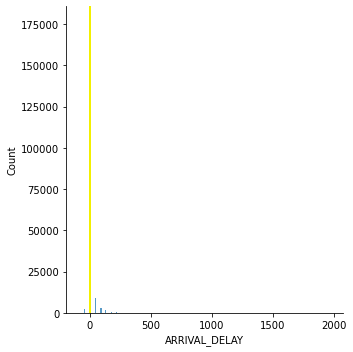

In [117]:
# Grafiquemos 
ax = sns.displot(flights.ARRIVAL_DELAY);

plt.axvline(flightsDELAY_mean, color='red', ls='-');
plt.axvline(sample_mean, color='black', ls='-');
plt.axvline(inf, color='yellow', ls='-');
plt.axvline(sup, color='yellow', ls='-');
